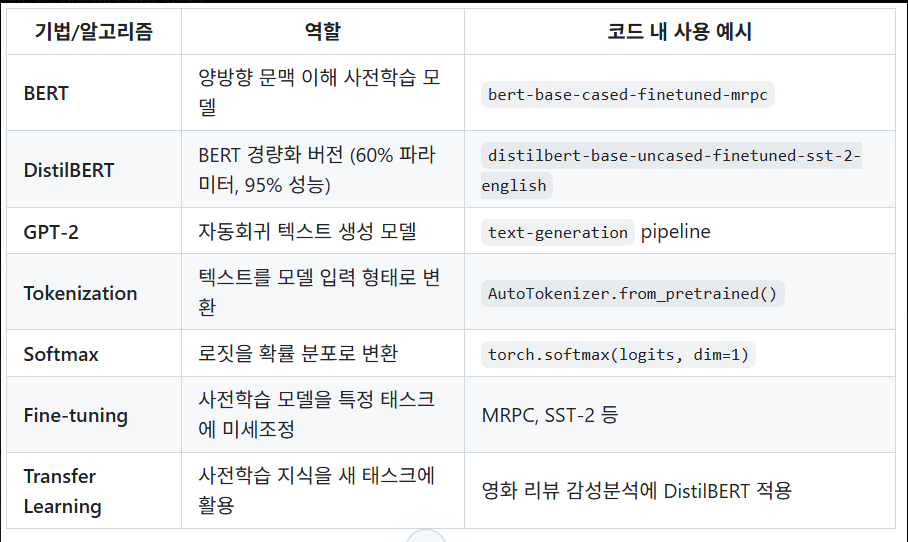
```
- 빈칸채우기

- 데이터
- Hugging Face Transformers Pipeline(간단한 api)
- 토크나이져 ( 텍스트 -> 토큰 -> 숫자 ID)
- 사전학습된 모델(BERT, GPT-2, DirstillBERT 등)
- 예측 결과(감성분석, 텍스트 생성, 문장 유사도)
- 후처리 평가(확률 변환, 정확도 계산)
```

```
"I went to the [MASK] to buy some milk"
BERT 예측 : [MASK] = "store" (앞뒤 문맥 buy, milk를 보고 추론)
```

### 사전학습 방법
    - MLM(Masked Language Model) : 문장의 15% 단어를 MASK 처리한 다음 예측
    - NSP(Next Sentence Prediction) : 두문장이 연결되는지 판단
```
사전학습(대규모 테스트)
[CLS] token 추가
특정 테스크 레이블로 학습(감성분석, QA 등)
```

### DistillBERT
    - BERT 압축버전 : 속도가 빠르다, 성능은 95% 유지함
    - 두꺼운 교과서(BERT)의 핵심만 추린 요약본(DistillBERT)
### 지식증류(Knowledge Distillation)
    - Teacher 모델(BERT) : 소프트레이블 생성(확률분포)
    - Student 모델(DistillBERT) : Teacher 출력을 모방
### GPT-2
    - 이전 단어들을 보고 다음 단어를 예측
    - 단방향 Attention
    - Zero-shot Learning : 특정 테스트 학습 없이도 수행 가능
    - GPT 시리즈
        - GPT-1 : 117M 파라미터
        - GPT-2 : 1.5B 파라미터
        - GPT-3 : 175B 파라미터(Few-shot Learning)
        - GPT-4 : 멀티모달

In [3]:
import numpy as np
def softmax(logits):
    '''
    로짓을 확률 분포로 변환
    Args:
        logits : 모델의 출력 점수( [2.5, 1.0, 0.5] )
    Returns:
        확률 분포(합이 1인 배열)
    '''
    # 수치 안정성을 위해 최대값을 빼줌(오버플로우 방지)
    exp_logits = np.exp(logits - np.max(logits))
    return exp_logits / np.sum(exp_logits)
logits = np.array([2.5, 1.0, 0.5])
probs = softmax(logits)
print(f'logits : {logits}')
print(f'softmax : {probs}')
print(f'softmax sum : {np.sum(probs)}')

logits : [2.5 1.  0.5]
softmax : [0.73612472 0.16425163 0.09962365]
softmax sum : 0.9999999999999999


### WordPiece  Word + Piece
    - 단어를 자주 등장하는 조각(piece) 단위로 잘라서 처리
    - 기존 토크나이져 대비 --> 더 잘게 쪼개자. (Subword)
    - playing ---->  play + ##ing   ## 앞조각에 붙는 서브워드 라는 의미
    - 득템  ----------> 득 + 템

WordPiece 토큰화 시뮬레이션

In [ ]:
# %conda install transformers

3 channel Terms of Service accepted
Retrieving notices: done
Channels:
 - defaults
Platform: win-64
Solving environment: done

## Package Plan ##

  environment location: c:\Users\playdata2\miniconda3\envs\deep

  added / updated specs:
    - transformers


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    aiodns-3.5.0               |  py311haa95532_1          24 KB
    aiohappyeyeballs-2.6.1     |  py311haa95532_0          37 KB
    aiohttp-3.13.2             |  py311h02ab6af_0         952 KB
    aiosignal-1.4.0            |  py311haa95532_0          18 KB
    arrow-cpp-21.0.0           |       h0399227_0         7.2 MB
    attrs-25.4.0               |  py311haa95532_2         174 KB
    aws-c-auth-0.9.0           |       h02ab6af_2         123 KB
    aws-c-cal-0.9.2            |       h02ab6af_1          57 KB
    aws-c-common-0.12.4        |       h02ab6af_0         263 KB
    aws-c-com

In [ ]:
from transformers import AutoTokenizer
# BERT 토크나이져 로드
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
# 테스트 문장
sentence = "I love natural language processing!"
# 토큰화
tokens = tokenizer.tokenize(sentence)
token_ids = tokenizer.encode(sentence)
# 디코딩
decoded = tokenizer.decode(token_ids)
print(f'원본문장 : {sentence}')
print(f'토큰ID : {token_ids}')
print(f'토큰목록 : {tokens}')
print(f'디코딩 결과 : {decoded}')

print(f'CLS토큰 : {tokenizer.cls_token} -> {tokenizer.cls_token_id}')
print(f'SEP토큰 : {tokenizer.sep_token} -> {tokenizer.sep_token_id}')
print(f'PAD토큰 : {tokenizer.pad_token} -> {tokenizer.pad_token_id}')

c:\Users\playdata2\miniconda3\envs\deep\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\playdata2\miniconda3\envs\deep\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


'[CLS] i love natural language processing! [SEP]'